<a href="https://colab.research.google.com/github/crodier1/data_science/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

In [ ]:
dataset = pd.read_csv('wine-reviews.csv')[['description', 'points']]

In [ ]:
dataset.points = (dataset.points >= 90).astype(int)

In [ ]:
train, val, test = np.split(dataset.sample(frac=1), [int(.85 * len(dataset)), int(.9 * len(dataset))])

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('points')
  df = df.description
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [ ]:
train = df_to_dataset(train)
val = df_to_dataset(val)
test = df_to_dataset(test)

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"

hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True )

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer= regularizers.L2(.01)))
model.add(tf.keras.layers.Dropout(.2))
model.add(tf.keras.layers.Dense(16, activation='relu',  kernel_regularizer= regularizers.L2(.01)))
model.add(tf.keras.layers.Dropout(.2))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy']
              )

In [ ]:
model.evaluate(train)

108/108 [==============================] - 2s 14ms/step - loss: 1.1362 - accuracy: 0.5470


[1.1362324953079224, 0.5469925403594971]

In [ ]:
model.evaluate(val)

7/7 [==============================] - 0s 13ms/step - loss: 1.1372 - accuracy: 0.5352


[1.1372411251068115, 0.5352416038513184]

In [ ]:
history = model.fit(train, epochs=5, validation_data = val)

Epoch 1/5
108/108 [==============================] - 155s 1s/step - loss: 0.6302 - accuracy: 0.7944 - val_loss: 0.5155 - val_accuracy: 0.8232
Epoch 2/5
108/108 [==============================] - 149s 1s/step - loss: 0.4784 - accuracy: 0.8324 - val_loss: 0.4471 - val_accuracy: 0.8315
Epoch 3/5
108/108 [==============================] - 150s 1s/step - loss: 0.4191 - accuracy: 0.8474 - val_loss: 0.4204 - val_accuracy: 0.8366
Epoch 4/5
108/108 [==============================] - 152s 1s/step - loss: 0.3868 - accuracy: 0.8575 - val_loss: 0.4053 - val_accuracy: 0.8400
Epoch 5/5
108/108 [==============================] - 150s 1s/step - loss: 0.3654 - accuracy: 0.8662 - val_loss: 0.4015 - val_accuracy: 0.8389


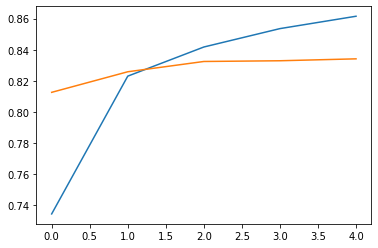

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()

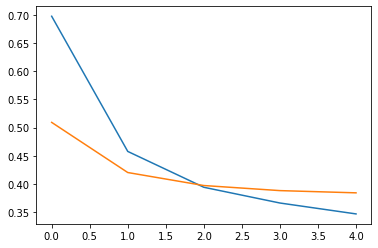

In [ ]:
plt.plot(history.history['loss'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Validation Accuracy')
plt.show()

In [ ]:
model.evaluate(test)

13/13 [==============================] - 3s 178ms/step - loss: 0.3847 - accuracy: 0.8310


[0.38468343019485474, 0.8309739828109741]